In [7]:
import matplotlib.pyplot as plt
import numpy as np
import csv

### Settings
view_from = '2image' # '2image' or '_side' or '_arm'
view, channel = 1, 3
if view_from == '2image':
    view, channel = 2, 6
cropTF = '_nocrop' # '_nocrop' or ''
model_path = './gym_fetch/models/'
model_name = f'actor{cropTF}{view_from}/actor{view_from}-99.pth'

image_cropped_size = 128 # 112
image_orig_size = 128
z_dim = 64
vae_path = './gym_fetch/models/'

beta_rec = 0.0 # 98304.0 10000.0
batch_size = 128
beta_kl = 25.0 # 1.0 25.0
vae_model = "CNNBasedVAE" # "SVAE" or "CNNBasedVAE"
weight_cross_penalty = 10.0
task_weight = 100.0 # task aware
VAEepoch_list = [99, 499, 999, 2999]
norm_sample = False # False True

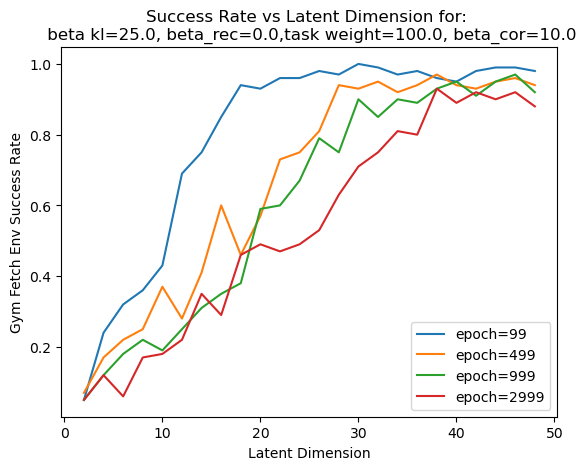

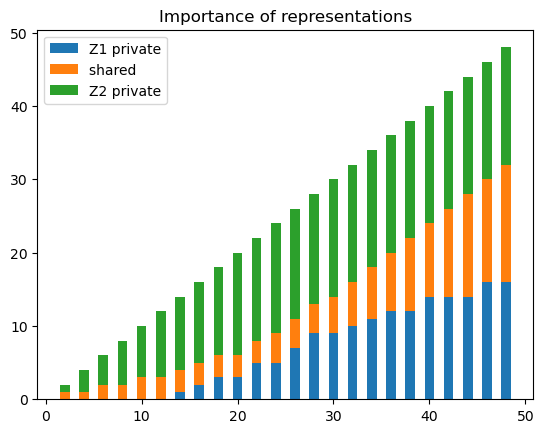

In [8]:
### load csv file
z_list, sucess_rate = [], []
rep_dims = [[], [], []]
for VAEepoch in VAEepoch_list:
    z_list.append([])
    sucess_rate.append([])
    vae_name = f'gym_fetch_{z_dim}_aware{norm_sample}{vae_model}_{beta_kl}_{beta_rec}_{task_weight}_{batch_size}_{weight_cross_penalty}/DVAE_awa-{VAEepoch}.pth'
    csv_name = vae_name.replace('.pth', '.csv').replace('/DVAE', '_DVAE')
    with open('/home/pl22767/DistributedTaskAwareCompression/fetch_sim/csv_data/' + csv_name, 'r') as f:
        reader = csv.reader(f)
        for row in reader:
            if row[0] == 'dpca_dim':
                continue
            else:
                z_list[-1].append(int(row[0]))
                sucess_rate[-1].append(float(row[4]))
                if VAEepoch == 99:
                    rep_dims[0].append(int(row[5]))
                    rep_dims[1].append(int(row[6]))
                    rep_dims[2].append(int(row[7]))

rep_dims = np.array(rep_dims)

### plot
for VAEepoch, z, sr in zip(VAEepoch_list, z_list, sucess_rate):
    plt.plot(z, sr, label=f"epoch={VAEepoch}")
plt.ylabel("Gym Fetch Env Success Rate")
plt.xlabel("Latent Dimension")
plt.title(f"Success Rate vs Latent Dimension for: \n beta kl={beta_kl}, beta_rec={beta_rec},task weight={task_weight}, beta_cor={weight_cross_penalty}")
plt.legend()
plt.show()
# plt.savefig(/home/pl22767/DistributedTaskAwareCompression/fetch_sim/csv_data/' + csv_name.replace('.csv', '.png'))

### stacked bar plot
colors = ['blue', 'orange', 'green']
plt.bar(z_list[0], rep_dims[0], 1, label='Z1 private')
plt.bar(z_list[0], rep_dims[1], 1, label='shared ', bottom=rep_dims[0])
plt.bar(z_list[0], rep_dims[2], 1, label='Z2 private', bottom=rep_dims[0]+rep_dims[1])
plt.legend(loc="upper left")
plt.title('Importance of representations')
plt.show()

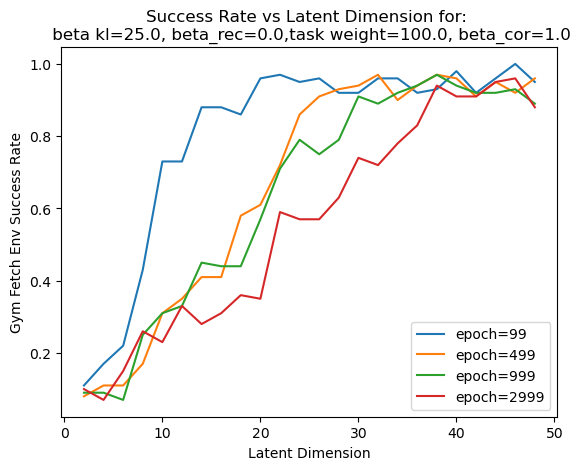

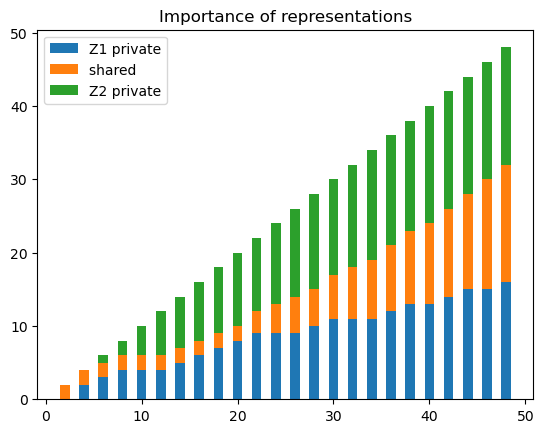

In [9]:
### load csv file
weight_cross_penalty = 1.0
z_list, sucess_rate = [], []
rep_dims = [[], [], []]
for VAEepoch in VAEepoch_list:
    z_list.append([])
    sucess_rate.append([])
    vae_name = f'gym_fetch_{z_dim}_aware{norm_sample}{vae_model}_{beta_kl}_{beta_rec}_{task_weight}_{batch_size}_{weight_cross_penalty}/DVAE_awa-{VAEepoch}.pth'
    csv_name = vae_name.replace('.pth', '.csv').replace('/DVAE', '_DVAE')
    with open('/home/pl22767/DistributedTaskAwareCompression/fetch_sim/csv_data/' + csv_name, 'r') as f:
        reader = csv.reader(f)
        for row in reader:
            if row[0] == 'dpca_dim':
                continue
            else:
                z_list[-1].append(int(row[0]))
                sucess_rate[-1].append(float(row[4]))
                if VAEepoch == 99:
                    rep_dims[0].append(int(row[5]))
                    rep_dims[1].append(int(row[6]))
                    rep_dims[2].append(int(row[7]))

rep_dims = np.array(rep_dims)

### plot             
for VAEepoch, z, sr in zip(VAEepoch_list, z_list, sucess_rate):
    plt.plot(z, sr, label=f"epoch={VAEepoch}")
plt.ylabel("Gym Fetch Env Success Rate")
plt.xlabel("Latent Dimension")
plt.title(f"Success Rate vs Latent Dimension for: \n beta kl={beta_kl}, beta_rec={beta_rec},task weight={task_weight}, beta_cor={weight_cross_penalty}")
plt.legend()
plt.show()
# plt.savefig(/home/pl22767/DistributedTaskAwareCompression/fetch_sim/csv_data/' + csv_name.replace('.csv', '.png'))

### stacked bar plot
colors = ['blue', 'orange', 'green']
plt.bar(z_list[0], rep_dims[0], 1, label='Z1 private')
plt.bar(z_list[0], rep_dims[1], 1, label='shared ', bottom=rep_dims[0])
plt.bar(z_list[0], rep_dims[2], 1, label='Z2 private', bottom=rep_dims[0]+rep_dims[1])
plt.legend(loc="upper left")
plt.title('Importance of representations')
plt.show()

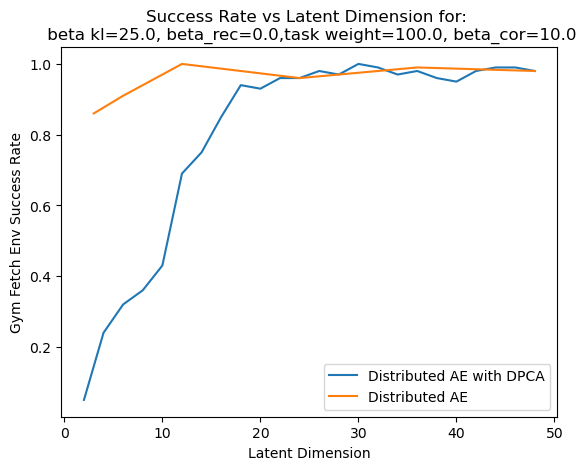

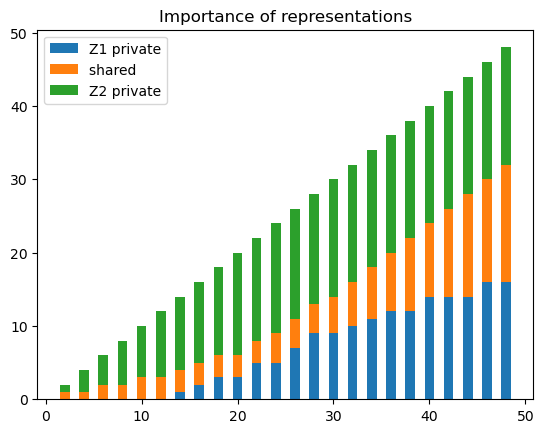

In [10]:
### load csv file
weight_cross_penalty = 10.0
z_list, sucess_rate = [], []
rep_dims = [[], [], []]
for VAEepoch in [99]:
    z_list.append([])
    sucess_rate.append([])
    vae_name = f'gym_fetch_{z_dim}_aware{norm_sample}{vae_model}_{beta_kl}_{beta_rec}_{task_weight}_{batch_size}_{weight_cross_penalty}/DVAE_awa-{VAEepoch}.pth'
    csv_name = vae_name.replace('.pth', '.csv').replace('/DVAE', '_DVAE')
    with open('/home/pl22767/DistributedTaskAwareCompression/fetch_sim/csv_data/' + csv_name, 'r') as f:
        reader = csv.reader(f)
        for row in reader:
            if row[0] == 'dpca_dim':
                continue
            else:
                z_list[-1].append(int(row[0]))
                sucess_rate[-1].append(float(row[4]))
                if VAEepoch == 99:
                    rep_dims[0].append(int(row[5]))
                    rep_dims[1].append(int(row[6]))
                    rep_dims[2].append(int(row[7]))

rep_dims = np.array(rep_dims)

rep_dims2 = [3, 6, 12, 24, 36, 48]
acc = [0.86, 0.91, 1, 0.96, 0.99, 0.98]

### plot             
for VAEepoch, z, sr in zip(VAEepoch_list, z_list, sucess_rate):
    plt.plot(z, sr, label="Distributed AE with DPCA")
plt.plot(rep_dims2, acc, label='Distributed AE')
plt.ylabel("Gym Fetch Env Success Rate")
plt.xlabel("Latent Dimension")
plt.title(f"Success Rate vs Latent Dimension for: \n beta kl={beta_kl}, beta_rec={beta_rec},task weight={task_weight}, beta_cor={weight_cross_penalty}")
plt.legend()
plt.show()
# plt.savefig(/home/pl22767/DistributedTaskAwareCompression/fetch_sim/csv_data/' + csv_name.replace('.csv', '.png'))

### stacked bar plot
colors = ['blue', 'orange', 'green']
plt.bar(z_list[0], rep_dims[0], 1, label='Z1 private')
plt.bar(z_list[0], rep_dims[1], 1, label='shared ', bottom=rep_dims[0])
plt.bar(z_list[0], rep_dims[2], 1, label='Z2 private', bottom=rep_dims[0]+rep_dims[1])
plt.legend(loc="upper left")
plt.title('Importance of representations')
plt.show()

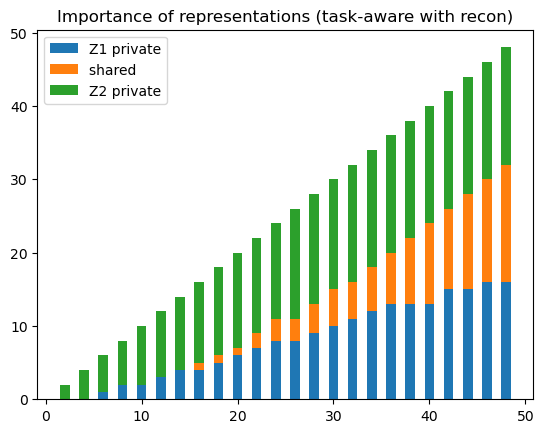

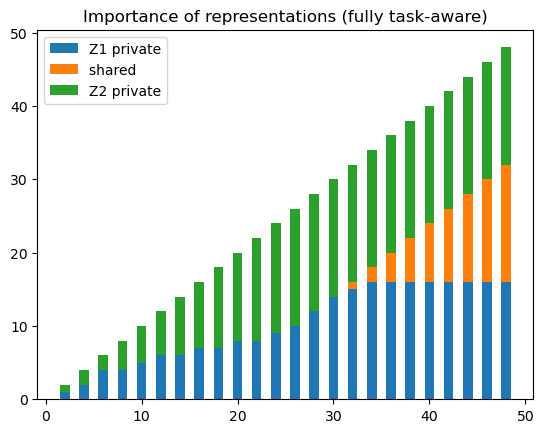

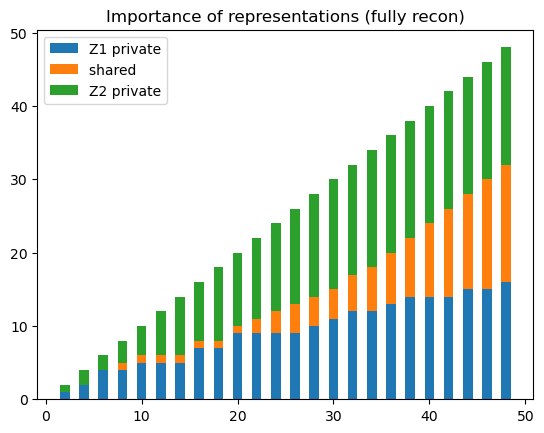

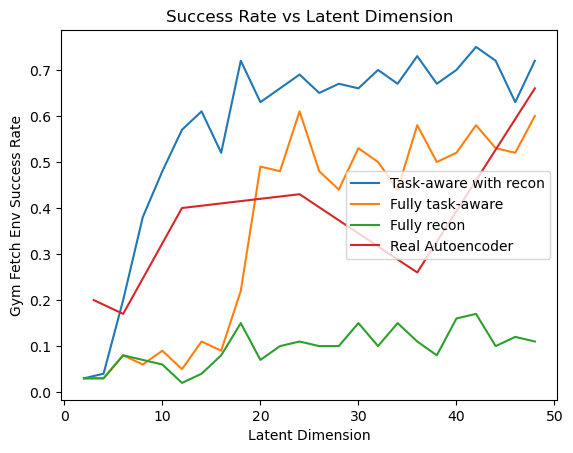

In [11]:
### Settings
view_from = '2image' # '2image' or '_side' or '_arm'
view, channel = 1, 3
if view_from == '2image':
    view, channel = 2, 6
cropTF = '_nocrop' # '_nocrop' or ''
model_path = ""
model_name = "/home/pl22767/DistributedTaskAwareCompression/fetch_sim/data/FetchPickAndPlace-v1/sparse-rad_sac-pixel-crop-01-26-FetchPickAndPlace-v1-im84-b128-nu1-change_model-s13618-id94666/model/actor_254000.pt"

image_cropped_size = 128 # 112
image_orig_size = 128
z_dim = 64
vae_path = './gym_fetch/models/'

beta_rec = 5000.0 # 98304.0 10000.0
batch_size = 128
beta_kl = 25.0 # 1.0 25.0
vae_model = "CNNBasedVAE" # "SVAE" or "CNNBasedVAE"
weight_cross_penalty = 10.0
task_weight = 500.0 # task aware
VAEepoch_list = [2999]
norm_sample = False # False True
VAEcrop = True # 'True' or '' or 'False'
dataset = 'PickAndPlace' # 'PickAndPlace' or 'gym_fetch'

### load csv file
z_list, sucess_rate = [], []
rep_dims = [[], [], []]
for VAEepoch in VAEepoch_list:
    z_list.append([])
    sucess_rate.append([])
    vae_name = f'{dataset}_{z_dim}_aware{norm_sample}_{VAEcrop}{vae_model}_{beta_kl}_{beta_rec}_{task_weight}_{batch_size}_{weight_cross_penalty}/DVAE_awa-{VAEepoch}.pth'
    csv_name = vae_name.replace('.pth', '.csv').replace('/DVAE', '_DVAE')
    with open('/home/pl22767/DistributedTaskAwareCompression/fetch_sim/csv_data/' + csv_name, 'r') as f:
        reader = csv.reader(f)
        for row in reader:
            if row[0] == 'dpca_dim':
                continue
            else:
                z_list[-1].append(int(row[0]))
                sucess_rate[-1].append(float(row[4]))
                if VAEepoch == 2999:
                    rep_dims[0].append(int(row[5]))
                    rep_dims[1].append(int(row[6]))
                    rep_dims[2].append(int(row[7]))

rep_dims = np.array(rep_dims)
### stacked bar plot
colors = ['blue', 'orange', 'green']
plt.bar(z_list[0], rep_dims[0], 1, label='Z1 private')
plt.bar(z_list[0], rep_dims[1], 1, label='shared ', bottom=rep_dims[0])
plt.bar(z_list[0], rep_dims[2], 1, label='Z2 private', bottom=rep_dims[0]+rep_dims[1])
plt.legend(loc="upper left")
plt.title('Importance of representations (task-aware with recon)')
plt.show()

task_weight = 100.0
beta_rec = 0.0
rep_dims = [[], [], []]
z_list.append([])
sucess_rate.append([])
vae_name = f'{dataset}_{z_dim}_aware{norm_sample}_{VAEcrop}{vae_model}_{beta_kl}_{beta_rec}_{task_weight}_{batch_size}_{weight_cross_penalty}/DVAE_awa-{VAEepoch}.pth'
csv_name = vae_name.replace('.pth', '.csv').replace('/DVAE', '_DVAE')
with open('/home/pl22767/DistributedTaskAwareCompression/fetch_sim/csv_data/' + csv_name, 'r') as f:
        reader = csv.reader(f)
        for row in reader:
            if row[0] == 'dpca_dim':
                continue
            else:
                z_list[-1].append(int(row[0]))
                sucess_rate[-1].append(float(row[4]))
                rep_dims[0].append(int(row[5]))
                rep_dims[1].append(int(row[6]))
                rep_dims[2].append(int(row[7]))

rep_dims = np.array(rep_dims)

### stacked bar plot
colors = ['blue', 'orange', 'green']
plt.bar(z_list[0], rep_dims[0], 1, label='Z1 private')
plt.bar(z_list[0], rep_dims[1], 1, label='shared ', bottom=rep_dims[0])
plt.bar(z_list[0], rep_dims[2], 1, label='Z2 private', bottom=rep_dims[0]+rep_dims[1])
plt.legend(loc="upper left")
plt.title('Importance of representations (fully task-aware)')
plt.show()

task_weight = 0.0
beta_rec = 10000.0
rep_dims = [[], [], []]
z_list.append([])
sucess_rate.append([])
vae_name = f'{dataset}_{z_dim}_aware{norm_sample}_{VAEcrop}{vae_model}_{beta_kl}_{beta_rec}_{task_weight}_{batch_size}_{weight_cross_penalty}/DVAE_awa-{VAEepoch}.pth'
csv_name = vae_name.replace('.pth', '.csv').replace('/DVAE', '_DVAE')
with open('/home/pl22767/DistributedTaskAwareCompression/fetch_sim/csv_data/' + csv_name, 'r') as f:
        reader = csv.reader(f)
        for row in reader:
            if row[0] == 'dpca_dim':
                continue
            else:
                z_list[-1].append(int(row[0]))
                sucess_rate[-1].append(float(row[4]))
                rep_dims[0].append(int(row[5]))
                rep_dims[1].append(int(row[6]))
                rep_dims[2].append(int(row[7]))

rep_dims = np.array(rep_dims)

### stacked bar plot
colors = ['blue', 'orange', 'green']
plt.bar(z_list[0], rep_dims[0], 1, label='Z1 private')
plt.bar(z_list[0], rep_dims[1], 1, label='shared ', bottom=rep_dims[0])
plt.bar(z_list[0], rep_dims[2], 1, label='Z2 private', bottom=rep_dims[0]+rep_dims[1])
plt.legend(loc="upper left")
plt.title('Importance of representations (fully recon)')
plt.show()

label = ['Task-aware with recon', 'Fully task-aware', 'Fully recon']

### plot
for l, z, sr in zip(label, z_list, sucess_rate):
    plt.plot(z, sr, label=l)
### real learning model
plt.plot([3, 6, 12, 24, 48], [0.20, 0.17, 0.40, 0.43, 0.66], label='Real Autoencoder')

plt.ylabel("Gym Fetch Env Success Rate")
plt.xlabel("Latent Dimension")
plt.title(f"Success Rate vs Latent Dimension") # \n beta kl={beta_kl}, beta_rec={beta_rec},task weight={task_weight}, beta_cor={weight_cross_penalty}")
plt.legend()
plt.show()
